# Frequencies
This file contains code for breaking the brain data into frequency components

[u'TP9', u'FP1', u'FP2', u'TP10', u'n/a', u'n/a']
[u'C:\\Users\\gsteelman\\Desktop\\Neurotech']
[[478880]]
[[ (array([u'100'],
      dtype='<U3'), array([[2442]], dtype=uint16), array([[1]], dtype=uint8))
  (array([u'100'],
      dtype='<U3'), array([[ 2446.00063276]]), array([[1]], dtype=uint8))
  (array([u'149'],
      dtype='<U3'), array([[ 23617.30536285]]), array([[1]], dtype=uint8))
  (array([u'12'],
      dtype='<U2'), array([[ 42981.47397581]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array([[ 55614.90879303]]), array([[1]], dtype=uint8))
  (array([u'12'],
      dtype='<U2'), array([[ 75949.85739276]]), array([[1]], dtype=uint8))
  (array([u'149'],
      dtype='<U3'), array([[ 89237.90749371]]), array([[1]], dtype=uint8))
  (array([u'12'],
      dtype='<U2'), array([[ 108918.29084155]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array([[ 122597.24566075]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array(

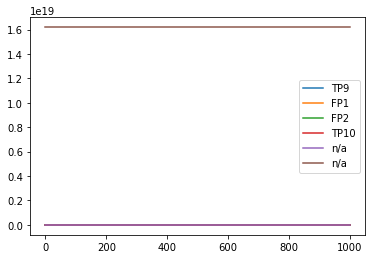

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import scipy.stats
from scipy.integrate import trapz

%run 'preprocessing.ipynb'

In [84]:
df.tail()

478880

In [86]:
avg_freq = (np.fft.fft(df['FP1']) + np.fft.fft(df['FP2']) + np.fft.fft(df['TP9']) + np.fft.fft(df['TP10']))/4

478880

In [87]:
positive_data = np.array(avg_freq[:len(avg_freq)/2], dtype='int64')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


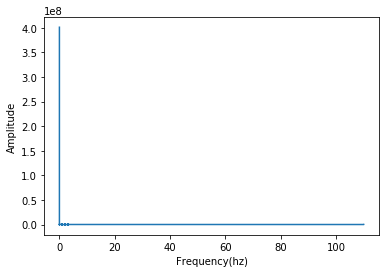

In [89]:
freq = np.transpose(np.array(range(len(positive_data)))/(len(avg_freq)/s['srate']))

plt.plot(freq, positive_data)
plt.xlabel('Frequency(hz)')
plt.ylabel('Amplitude')

In [83]:
# determine the total amplitude in the beta frequency range - characteristic of high engagement
beta_upper = int(math.ceil((len(freq))*6/s['srate']))
beta_lower = int(math.floor((len(freq))*2.4/s['srate']))

beta_amp = abs(trapz(positive_data[beta_lower:beta_upper]))
beta_amp


13185760.0

In [80]:
# determine the total amplitude in the alpha frequency range - characteristic of low engagement
alpha_upper = int(math.ceil((len(freq))*1.77/s['srate']))
alpha_lower = int(math.floor((len(freq))*0.9/s['srate']))

alpha_amp = abs(trapz(positive_data[alpha_lower:alpha_upper]))
alpha_amp

13546670.5

In [81]:
# determine the total amplitude in the theta frequency range - characteristic of sleep/daydream
theta_upper = int(math.ceil((len(freq))*1.35/s['srate']))
theta_lower = int(math.floor((len(freq))*0.45/s['srate']))

theta_amp = abs(trapz(positive_data[theta_lower:theta_upper]))
theta_amp

4134279.5

In [82]:
# determine the total amplitude in the delta frequency range - characteristic of deepest sleep
delta_upper = int(math.ceil((len(freq))*0.6/s['srate']))
delta_lower = int(math.floor((len(freq))*0.22/s['srate']))

delta_amp = abs(trapz(positive_data[delta_lower:delta_upper]))
delta_amp

24702237.0

In [95]:
def waveAmps(recorded_data, num_trials):
    waves = []
    for trial in num_trials:
    
        # determine the total amplitude in the beta frequency range - characteristic of high engagement
        beta_upper = int(math.ceil((len(freq))*6/s['srate']))
        beta_lower = int(math.floor((len(freq))*2.4/s['srate']))
        beta_amp = abs(trapz(positive_data[trial][beta_lower:beta_upper]))
        
        # determine the total amplitude in the alpha frequency range - characteristic of low engagement
        alpha_upper = int(math.ceil((len(freq))*1.77/s['srate']))
        alpha_lower = int(math.floor((len(freq))*0.9/s['srate']))
        alpha_amp = abs(trapz(positive_data[trial][alpha_lower:alpha_upper]))
        
        # determine the total amplitude in the theta frequency range - characteristic of sleep/daydream
        theta_upper = int(math.ceil((len(freq))*1.35/s['srate']))
        theta_lower = int(math.floor((len(freq))*0.45/s['srate']))
        theta_amp = abs(trapz(positive_data[trial][theta_lower:theta_upper]))
        
        # determine the total amplitude in the delta frequency range - characteristic of deepest sleep
        delta_upper = int(math.ceil((len(freq))*0.6/s['srate']))
        delta_lower = int(math.floor((len(freq))*0.22/s['srate']))
        delta_amp = abs(trapz(positive_data[trial][delta_lower:delta_upper]))
                                            
        waves = np.append(waves, [beta_amp, alpha_amp, theta_amp, delta_amp], axis=0)
    return waves